<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/SpaceVector_ThreePhaseUnbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Space Vector of Unbalanced Three-Phase Variables</h1></b>

Dr. Bingsen Wang

7/4/2024
</center>

#Space Vector

The space vector is complex variable defined as
$$\underline f = {2\over3}\left(f_a + f_be^{j\frac{2\pi}{3}} + f_ce^{j\frac{4\pi}{3}}\right)\tag{1}$$
where $f_a,f_b,f_c$ are the three-phase variables. In electrical systems, the variable $f$ can be voltage $v$, current $i$, or flux linkage $\lambda$. In power electronics systems, the variable $f$ can be the modulation function or switching function.

#Space Vector of Positive-Sequence and Negative Sequence

Since the space vector of zero sequence is always zero, only the positive and negative sequences are considered here althoug zero sequence may have pratical significance.

The postive sequence and negative sequence of three-phase variables are expressed in
$$\begin{align}
v_a &= V_p\cos\left(\omega t+\theta_p \right) &+&V_n\cos\left(\omega t+\theta_n \right)\\
v_b &= V_p\cos\left(\omega t+\theta_p - \frac{2\pi}{3} \right) &+&V_n\cos\left(\omega t+\theta_n + \frac{2\pi}{3} \right)\\
v_c &= V_p\cos\left(\omega t+\theta_p + \frac{2\pi}{3} \right) &+& V_n\cos\left(\omega t+\theta_n - \frac{2\pi}{3} \right)
\end{align}\tag{2}$$

The voltage space vector is
$$\begin{align}
\underline v &= {2\over3}\left(v_a + v_be^{j\frac{2\pi}{3}} + v_ce^{j\frac{4\pi}{3}}\right)\\
&= \underbrace{V_p e^{j(\omega t+\theta_p)}}_{\underline v_p}+ \underbrace{V_n e^{-j(\omega t+\theta_n)}}_{\underline v_n}
\end{align}\tag{3}$$


#Python Code
The Python code illustrates the space vector of unbalanced three-phase variables that contain positive sequence and negative sequence.

0
0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
0


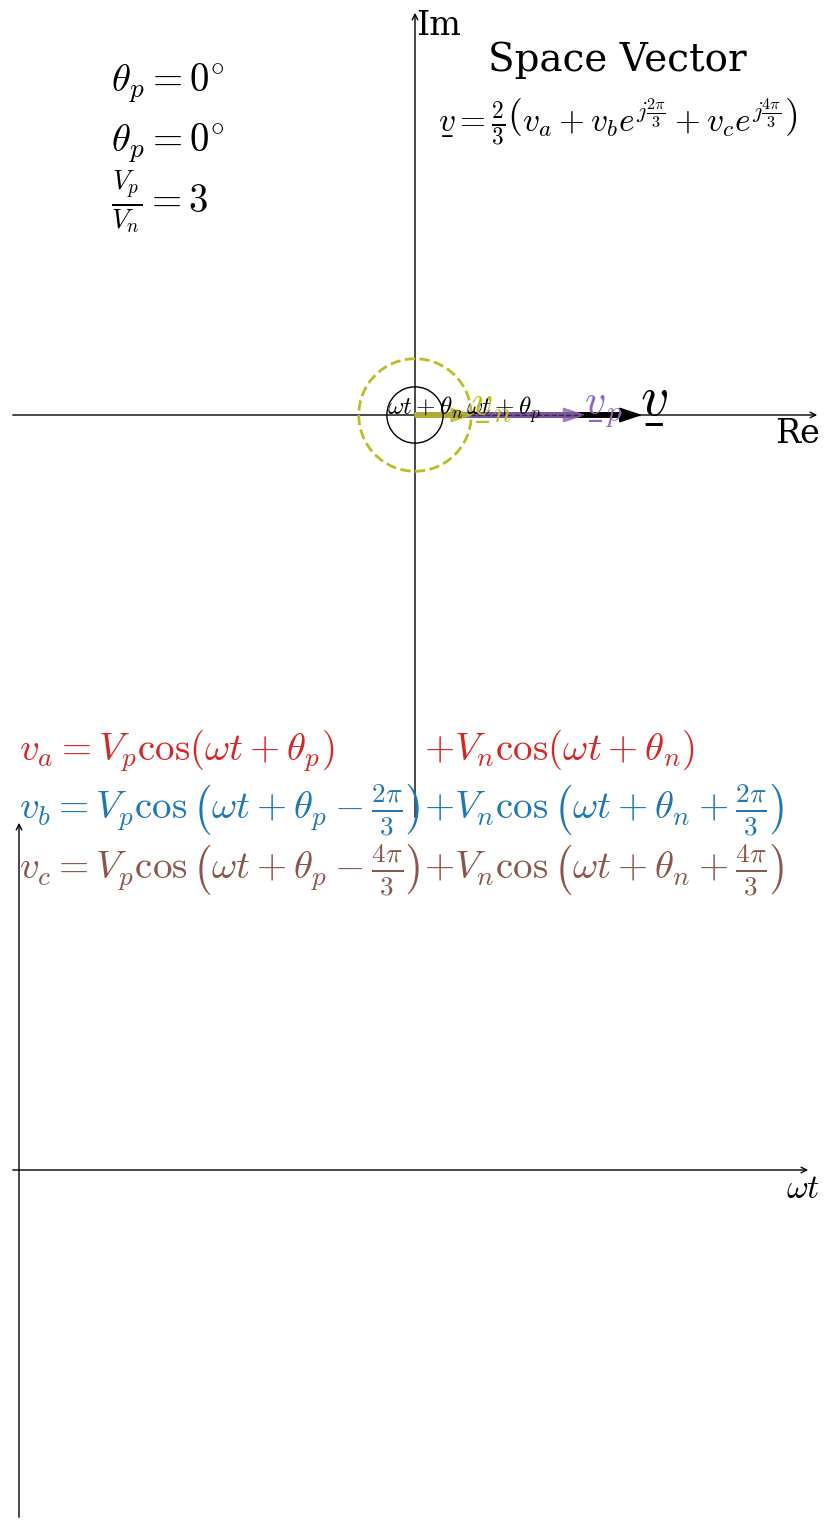

In [80]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#parameters
Nf = 900
f = 1 #frequency in Hz
T = 1/f #period

t=linspace(0,T,int(Nf/3))
wt = 2*pi*f*t
Vp = 2.5*.75 #voltage in V
Vn = 2.5*.25 #voltage in V

xymax = 4.5
clst=['tab:red', 'tab:blue', 'tab:brown']
fig = plt.figure(figsize=(9,16))
fig.tight_layout()
ax=fig.add_axes((0.05,7/16,.9,.9*9/16),xlim=[-xymax,xymax], ylim=[-xymax,xymax],fc='none') #no fc
ax0=fig.add_axes((0.05,7/16,.9,.9*9/16),xlim=[-xymax,xymax], ylim=[-xymax,xymax],fc='none') #no fc for animated parts
ax1=fig.add_axes((0.05,0,.9,7/16),xlim=[-.1,2*xymax-.1], ylim=[-xymax*7/9,xymax*7/9],fc='none') #no fc
ax.axis('off') #turn off axis frames
ax1.axis('off') #turn off axis frames
ax.annotate("", (xymax, 0), (-xymax, 0),arrowprops={'arrowstyle':"->"}) #x-axis for space vector
ax.annotate("", (0,xymax), (0,-xymax),arrowprops={'arrowstyle':"->"}) #y-axis for space vector
ax1.annotate("", (2*xymax-.2, 0), (-.1, 0),arrowprops={'arrowstyle':"->"}) #x-axis for voltages
ax1.annotate("", (0,xymax*7/9), (0,-xymax*7/9),arrowprops={'arrowstyle':"->"}) #y-axis for voltages
ax.text(xymax,-.03,'Re',size=24,va='top',ha='right') #x-axis label
ax.text(0.01,xymax,'Im',size=24,va='top') #y label
ax.text(xymax*.5,xymax*.85,'Space Vector',size=28,ha='center')
ax.text(xymax*.5,xymax*.7,r'$v\underbar = \frac{2}{3}\left(v_a + v_b e^{j\frac{2\pi}{3}}+ v_c e^{j\frac{4\pi}{3}}\right)$',
        size=24,ha='center')
text_thetap = ax.text(-xymax*.75,xymax*.8,'', size=28)
text_thetan = ax.text(-xymax*.75,xymax*.65,'', size=28)
ax.text(-xymax*.75,xymax*.5,r'$\frac{V_p}{V_n} = 3$', size=28)


lines = [] #array containing all the line segments
lines.append(ax.plot([], [], '-', lw=5, color='tab:orange')[0]) #v_sv trajectory
lines.append(ax1.plot([], [], '-', lw=5, color=clst[0])[0]) #v_a
lines.append(ax1.plot([], [], '-', lw=5, color=clst[1])[0]) #v_b
lines.append(ax1.plot([], [], '-', lw=5, color=clst[2])[0]) #v_c
ax1.text(0,xymax*8.2/9,r'$v_a=V_p\cos(\omega t+\theta_p)$',size=28,color=clst[0]) #va label
ax1.text(4.5,xymax*8.2/9,r'$+V_n\cos(\omega t+\theta_n)$',size=28,color=clst[0])

ax1.text(0,xymax*7/9,r'$v_b=V_p\cos\left(\omega t+\theta_p-\frac{2\pi}{3}\right)$',size=28,color=clst[1]) #vb label
ax1.text(4.5,xymax*7/9,r'$+V_n\cos\left(\omega t+\theta_n+\frac{2\pi}{3}\right)$',size=28,color=clst[1])

ax1.text(0,xymax*5.8/9,r'$v_c=V_p\cos\left(\omega t+\theta_p-\frac{4\pi}{3}\right)$',size=28,color=clst[2]) #vc label
ax1.text(4.5,xymax*5.8/9,r'$+V_n\cos\left(\omega t+\theta_n+\frac{4\pi}{3}\right)$',size=28,color=clst[2])

ax1.text(2*xymax-.1,-.03,r'$\omega t$',size=24,va='top',ha='right') #x-axis label

def drawVectors(ax,xymax,v_svp,v_svn,Vp,Vn,theta_p0,theta_n0):
  # theta_p = (thetap+wt+2*pi)%(2*pi)
  # theta_n = (thetan+wt+2*pi)%(2*pi)
  v_sv = v_svp + v_svn
  theta_p = np.angle(v_svp)
  theta_n= np.angle(v_svn)
  theta = np.angle(v_sv)
  if theta_p<0:
    theta_p = 2*pi+theta_p
  if theta_n<0:
    theta_n = 2*pi+theta_n
  if theta<0:
    theta = 2*pi+theta
  ax.clear()
  ax.set_xlim([-xymax,xymax])
  ax.set_ylim([-xymax,xymax])
  ax.axis('off')
  arr = mp.FancyArrow(0,0,v_sv.real, v_sv.imag, width=.05,length_includes_head=True,
                   color='k') #space vector v_sv
  ax.add_patch(arr)
  arr = mp.FancyArrow(0,0,v_svp.real, v_svp.imag, width=.05,length_includes_head=True,
                   color='tab:purple',alpha=.8) #space vector v_svp
  ax.add_patch(arr)
  arr = mp.FancyArrow(0,0,v_svn.real, v_svn.imag, width=.05,length_includes_head=True,
                   color='tab:olive',alpha=.8) #space vector v_svn
  ax.add_patch(arr)

  #trajectories for v_svp and v_svn
  arc = mp.Arc((0,0),Vp*2,Vp*2,theta1=theta_p0/pi*180,theta2=theta_p/pi*180,
               ls='--', lw=2, color='tab:purple')
  ax.add_patch(arc)
  arc = mp.Arc((0,0),Vn*2,Vn*2,theta2=-theta_n0/pi*180,theta1=theta_n/pi*180,
               ls='--', lw=2, color='tab:olive')
  ax.add_patch(arc)

  #arc for angle label
  arc = mp.Arc((0,0),Vp*.6,Vp*.6,theta1=0,theta2=theta_p/pi*180)
  ax.add_patch(arc)
  arc = mp.Arc((0,0),Vn,Vn,theta2=0,theta1=theta_n/pi*180)
  ax.add_patch(arc)
  ax.text(Vp*.3*cos(0.5*theta_p),Vp*.3*sin(.5*theta_p),r'$\omega t+\theta_p$', size = 18,color='k') #angle marking
  ax.text(-Vn*.5*cos(0.5*theta_n),-Vn*.5*sin(.5*theta_n),r'$\omega t+\theta_n$', size = 18,color='k') #angle marking
  ax.text(v_sv.real,v_sv.imag,r'$v\underbar$', size = 40)
  ax.text(v_svp.real,v_svp.imag,r'$v\underbar_p$', size = 30,color='tab:purple')
  ax.text(v_svn.real,v_svn.imag,r'$v\underbar_n$', size = 30,color='tab:olive')
  ax.plot([v_svp.real,v_sv.real,v_svn.real], [v_svp.imag,v_sv.imag,v_svn.imag],'k--',lw=1,alpha=.5)
  return

# animation function. This is called sequentially
def animate(ii):
  if ii%30==0: #for monitoring the progress
    print(ii)
  # ii=599
  if int(ii/300)==0:
    theta_p = 0 #phase angle in radians
    theta_n = 0 #phase angle in radians
    text_thetap.set_text(r'$\theta_p=0^{\circ}$')
    text_thetan.set_text(r'$\theta_p=0^{\circ}$')
  elif int(ii/300)==1:
    theta_p = pi/2 #phase angle in radians
    theta_n = 0 #phase angle in radians
    text_thetap.set_text(r'$\theta_p=90^{\circ}$')
    text_thetan.set_text(r'$\theta_n=0^{\circ}$')
  else:
    theta_p = 0 #phase angle in radians
    theta_n = pi/2 #phase angle in radians
    text_thetap.set_text(r'$\theta_p=0^{\circ}$')
    text_thetan.set_text(r'$\theta_n=90^{\circ}$')

  #positive sequence
  vap = Vp*cos(wt+theta_p)
  vbp = Vp*cos(wt+theta_p - 2*pi/3)
  vcp = Vp*cos(wt+theta_p - 4*pi/3)

  #negative sequence
  van = Vn*cos(wt+theta_n)
  vbn = Vn*cos(wt+theta_n + 2*pi/3)
  vcn = Vn*cos(wt+theta_n + 4*pi/3)

  #unblanced three phase
  va = vap+van
  vb = vbp+vbn
  vc = vcp+vcn

  i=ii%300

  #space vector
  v_svp = (2/3)*(vap + vbp*exp(1j*2*pi/3) + vcp*exp(1j*4*pi/3))
  v_svn = (2/3)*(van + vbn*exp(1j*2*pi/3) + vcn*exp(1j*4*pi/3))
  v_sv = v_svp + v_svn

  #plot
  lines[0].set_data(v_sv[:i].real,v_sv[:i].imag) #v_sv trajectory
  lines[1].set_data(t[:i]/T*xymax*1.9,va[:i]) #v_a
  lines[2].set_data(t[:i]/T*xymax*1.9,vb[:i]) #v_b
  lines[3].set_data(t[:i]/T*xymax*1.9,vc[:i]) #v_c
  drawVectors(ax0,xymax,v_svp[i],v_svn[i],Vp,Vn,theta_p,theta_n)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
fn = r"SpaceVector_PostiveAndNegativeSequence.mp4"
writervideo = animation.FFMpegWriter(fps=30)
anim.save(fn, writer=writervideo,dpi = 200)